In [1]:
!pip install nltk


[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package 

[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |    

[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]    |   Package ycoe is already up-to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection all


True

In [3]:
import pandas as pd
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')

df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [5]:
#create preprocessed text function

def preprocessed_text(text):
    
    #tokenized the text
    tokens = word_tokenize(text.lower())
    
    #remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    #lemmatize the tokens 
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    #join the tokens back to the string
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

In [6]:
#appply the function
df['processedText'] = df['reviewText'].apply(preprocessed_text)

In [7]:
df

,reviewText,Positive,processedText
0,This is a one of the best apps acording to a b...,1,one best apps acording bunch people agree bomb...
1,This is a pretty good version of the game for ...,1,pretty good version game free . lot different ...
2,this is a really cool game. there are a bunch ...,1,really cool game . bunch level find golden egg...
3,"This is a silly game and can be frustrating, b...",1,"silly game frustrating , lot fun definitely re..."
4,This is a terrific game on any pad. Hrs of fun...,1,terrific game pad . hr fun . grandkids love . ...
...,...,...,...
19995,this app is fricken stupid.it froze on the kin...,0,app fricken stupid.it froze kindle wont allow ...
19996,Please add me!!!!! I need neighbors! Ginger101...,1,please add ! ! ! ! ! need neighbor ! ginger101...
19997,love it! this game. is awesome. wish it had m...,1,love ! game . awesome . wish free stuff house ...
19998,I love love love this app on my side of fashio...,1,love love love app side fashion story fight wo...


In [8]:
#initialize NLTK sentiment analizer

analyzer = SentimentIntensityAnalyzer()

#create fun get_sentiment
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    
    sentiment = 1 if scores['pos'] > 0 else 0
    
    return sentiment

In [9]:
#apply get_setiment fun
df['sentimentScore'] = df['processedText'].apply(get_sentiment)

In [10]:
df

,reviewText,Positive,processedText,sentimentScore
0,This is a one of the best apps acording to a b...,1,one best apps acording bunch people agree bomb...,1
1,This is a pretty good version of the game for ...,1,pretty good version game free . lot different ...,1
2,this is a really cool game. there are a bunch ...,1,really cool game . bunch level find golden egg...,1
3,"This is a silly game and can be frustrating, b...",1,"silly game frustrating , lot fun definitely re...",1
4,This is a terrific game on any pad. Hrs of fun...,1,terrific game pad . hr fun . grandkids love . ...,1
...,...,...,...,...
19995,this app is fricken stupid.it froze on the kin...,0,app fricken stupid.it froze kindle wont allow ...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1,please add ! ! ! ! ! need neighbor ! ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1,love ! game . awesome . wish free stuff house ...,1
19998,I love love love this app on my side of fashio...,1,love love love app side fashion story fight wo...,1


In [11]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['Positive'], df['sentimentScore']))

[[ 1131  3636]
 [  576 14657]]


In [12]:
from sklearn.metrics import classification_report

print(classification_report(df['Positive'], df['sentimentScore']))

              precision    recall  f1-score   support

           0       0.66      0.24      0.35      4767
           1       0.80      0.96      0.87     15233

    accuracy                           0.79     20000
   macro avg       0.73      0.60      0.61     20000
weighted avg       0.77      0.79      0.75     20000



In [13]:
#stemming
from nltk.stem import PorterStemmer

#initialize python porter stemmer
ps = PorterStemmer()

In [14]:
#example inflection to reduce

example_use = ["program","programming","programer","programs","programmed"]

#perform stemming
print("{0:20}{1:20}".format("--Word--","--Stem--"))

for word in example_use:
    print("{0:20}{1:20}".format(word, ps.stem(word)))

--Word--            --Stem--            
program             program             
programming         program             
programer           program             
programs            program             
programmed          program             


In [15]:
import string
from nltk.tokenize import word_tokenize

In [16]:
example_sentence = "Python programmers often tend like programming in python because it's like english. We call people who program in python pythonistas."

In [17]:
#remove punctuaction
example_sentence_no_punc = example_sentence.translate(str.maketrans("", "", string.punctuation))

In [18]:
#create tokens
word_tokens = word_tokenize(example_sentence_no_punc)

In [19]:
#perform stemming
print("{0:20}{1:20}".format("--Word--", "--Stem--"))
for word in word_tokens:
    print("{0:20}{1:20}".format(word, ps.stem(word)))

--Word--            --Stem--            
Python              python              
programmers         programm            
often               often               
tend                tend                
like                like                
programming         program             
in                  in                  
python              python              
because             becaus              
its                 it                  
like                like                
english             english             
We                  we                  
call                call                
people              peopl               
who                 who                 
program             program             
in                  in                  
python              python              
pythonistas         pythonista          


In [20]:
from nltk.stem import WordNetLemmatizer

In [21]:
nltk.download('wordnet')
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
# Initialize wordnet lemmatizer
wnl = WordNetLemmatizer()

example_words = ["program","programming","programer","programs","programmed"]

In [23]:
#perform lemmatizer

print("{0:20}{1:20}".format("--Word--", "--Lemma--"))
for word in example_words:
    print("{0:20}{1:20}".format(word, wnl.lemmatize(word, pos = "v")))

--Word--            --Lemma--           
program             program             
programming         program             
programer           programer           
programs            program             
programmed          program             


In [24]:
example_sentence = "Python programmers often tend like programming in python because it's like english. We call people who program in python pythonistas."

In [25]:
#remove punctuation
example_sentence_no_pun = example_sentence.translate(str.maketrans("", "", string.punctuation))

In [26]:
word_tokens = word_tokenize(example_sentence_no_pun)

In [27]:
#perform lemmatization

print("{0:20}{1:20}".format("--Word--", "--Lemma--"))

for word in word_tokens:
    print("{0:20}{1:20}".format(word, wnl.lemmatize(word, pos="v")))

--Word--            --Lemma--           
Python              Python              
programmers         programmers         
often               often               
tend                tend                
like                like                
programming         program             
in                  in                  
python              python              
because             because             
its                 its                 
like                like                
english             english             
We                  We                  
call                call                
people              people              
who                 who                 
program             program             
in                  in                  
python              python              
pythonistas         pythonistas         


In [28]:
#Practising regular expression: re.split() and re.findall()
import re

my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

#write the pattern to match sentences endings: sentence_ending
sentence_endings = r"[?!]"

#split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

sentence_endings = r"[?! ]"
print(re.split(sentence_endings, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so.  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
["Let's", 'write', 'RegEx', '', '', "Won't", 'that', 'be', 'fun', '', '', 'I', 'sure', 'think', 'so.', '', 'Can', 'you', 'find', '4', 'sentences', '', '', 'Or', 'perhaps,', 'all', '19', 'words', '']


In [29]:
#find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

['Let', 'RegEx', 'Won', 'Can', 'Or']


In [30]:
#split my_string on space and print the result

space = r" "
print(re.split(space, my_string))

space = r"\s+"
print(re.split(space, my_string))

space = r"\s"
print(re.split(space, my_string))

["Let's", 'write', 'RegEx!', '', "Won't", 'that', 'be', 'fun?', '', 'I', 'sure', 'think', 'so.', '', 'Can', 'you', 'find', '4', 'sentences?', '', 'Or', 'perhaps,', 'all', '19', 'words?']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
["Let's", 'write', 'RegEx!', '', "Won't", 'that', 'be', 'fun?', '', 'I', 'sure', 'think', 'so.', '', 'Can', 'you', 'find', '4', 'sentences?', '', 'Or', 'perhaps,', 'all', '19', 'words?']


In [31]:
#find all digits in my_string and print the result

digits = r"\d+"
print(re.findall(digits, my_string))

['4', '19']


In [32]:
my_string = "Let's write RegEx!"
PATTERN = r"\w+"
re.findall(PATTERN, my_string)
['Let', 's', 'write', 'RegEx']

['Let', 's', 'write', 'RegEx']

In [33]:
PATTERN = r"\s+"
re.findall(PATTERN, my_string)
['Let', 's', 'write', 'RegEx']

['Let', 's', 'write', 'RegEx']

In [34]:
scene_one1 = """SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.
SOLDIER #1: What?  Ridden on a horse?
ARTHUR: Yes!
SOLDIER #1: You're using coconuts!
ARTHUR: What?
SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.
ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--
SOLDIER #1: Where'd you get the coconuts?
ARTHUR: We found them.
SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!
ARTHUR: What do you mean?
SOLDIER #1: Well, this is a temperate zone.
ARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?
SOLDIER #1: Are you suggesting coconuts migrate?
ARTHUR: Not at all.  They could be carried.
SOLDIER #1: What?  A swallow carrying a coconut?
ARTHUR: It could grip it by the husk!
SOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.
ARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.
SOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?
ARTHUR: Please!
SOLDIER #1: Am I right?
ARTHUR: I'm not interested!
SOLDIER #2: It could be carried by an African swallow!
SOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.
SOLDIER #2: Oh, yeah, I agree with that.
ARTHUR: Will you ask your master if he wants to join my court at Camelot?!
SOLDIER #1: But then of course a-- African swallows are non-migratory.
SOLDIER #2: Oh, yeah...
SOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] 
SOLDIER #2: Wait a minute!  Supposing two swallows carried it together?
SOLDIER #1: No, they'd have to have it on a line.
SOLDIER #2: Well, simple!  They'd just use a strand of creeper!
SOLDIER #1: What, held under the dorsal guiding feathers?
SOLDIER #2: Well, why not?"""

In [35]:
#word tokenization with NLTK

# Import necessary modules
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one1)
print(sentences)

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!', '[clop clop clop] \nSOLDIER #1: Halt!', 'Who goes there?', 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.', 'King of the Britons, defeator of the Saxons, sovereign of all England!', 'SOLDIER #1: Pull the other one!', 'ARTHUR: I am, ...  and this is my trusty servant Patsy.', 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.', 'I must speak with your lord and master.', 'SOLDIER #1: What?', 'Ridden on a horse?', 'ARTHUR: Yes!', "SOLDIER #1: You're using coconuts!", 'ARTHUR: What?', "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.", 'ARTHUR: So?', "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?", 'ARTHUR: We found them.', 'SOLDIER #1: Found them?', 'In Mercea?', "The coconut's tropical!", 'ARTHUR: What 

In [36]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[4])
print(tokenized_sent)

['King', 'of', 'the', 'Britons', ',', 'defeator', 'of', 'the', 'Saxons', ',', 'sovereign', 'of', 'all', 'England', '!']


In [37]:
# Make a set of unique tokens in the entire sceimportne: unique_tokens
unique_tokens = set(word_tokenize(scene_one1))

# Print the unique tokens result
print(unique_tokens)

{'seek', 'interested', ':', 'That', 'zone', 'guiding', 'SOLDIER', 'not', 'Not', "n't", 'could', 'other', 'winter', 'goes', 'one', 'grip', 'son', 'are', 'join', 'No', 'bird', 'these', 'strangers', '...', 'together', 'air-speed', 'that', '2', 'Please', 'So', 'them', 'What', 'in', 'Well', 'use', 'lord', 'anyway', 'get', 'where', 'am', 'weight', 'Listen', 'SCENE', "'s", 'will', 'there', '!', 'master', 'coconut', 'castle', 'me', 'Where', 'course', 'yeah', 'then', 'knights', '--', 'sovereign', 'of', 'temperate', 'climes', 'forty-three', 'it', 'may', 'to', 'clop', 'search', 'length', 'non-migratory', 'Saxons', 'ratios', 'why', 'England', 'Oh', 'from', 'do', 'Pendragon', 'Am', 'wants', 'Mercea', 'five', 'ask', 'or', 'Court', 'Pull', 'house', 'tropical', 'order', 'We', 'migrate', 'Uther', 'two', 'an', 'question', 'got', 'maybe', "'em", 'But', 'since', 'who', 'be', 'at', 'carry', 'Will', 'It', 'matter', 'I', 'swallow', 'you', 'covered', 'African', 'halves', 'every', 'fly', 'carried', 'They', 'A'

In [38]:
#search for the first occurance of "coconuts" in the scene one
match = re.search("coconuts", scene_one1)
print(match)

<re.Match object; span=(580, 588), match='coconuts'>


In [39]:
# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [40]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[([^\]]+)\]"

#use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one1))

<re.Match object; span=(9, 15), match='[wind]'>


In [41]:
import re

# Sample scene text
scene_one = "This is [vvv text] within square brackets. [xxx example] is here."

# Define the pattern to find text within square brackets (without brackets)
#pattern = r'\[([^\]]+)\]'
pattern = r'\[(.*?)\]'

# Use re.findall() to find all matches of the pattern
matches = re.findall(pattern, scene_one)

if matches:
    # Print all matched text without square brackets
    for match in matches:
        print(match)
else:
    print("No text within square brackets found in the scene.")

vvv text
xxx example


In [42]:
import re

# Sample scene text
scene_one = "This is [sample text] within square brackets. [Another example] is here."

# Define the pattern to find text within square brackets (including brackets)
pattern1 = r"\[.*\]"

# Use re.search() to find the first match of the pattern
match = re.search(pattern1, scene_one)

if match:
    # Get the matched text
    matched_text = match.group(0)

    # Remove the square brackets from the matched text
    text_within_brackets = matched_text[1:-1]

    print(text_within_brackets)
else:
    print("No text within square brackets found in the scene.")


sample text] within square brackets. [Another example


In [43]:
# Find the script notation at the beginning of the fourth sentence and print it
#pattern2 = r"[Character]+:" - wrong
pattern2 = r'[\w\s]+:'

print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


In [44]:
#Regex with NLTK tokenization
#Twitter is a frequently used source for NLP text and tasks. 
#In this exercise, you'll build a more complex tokenizer for tweets with hashtags and mentions using nltk and regex. 
#The nltk.tokenize.TweetTokenizer class gives you some extra methods and attributes for parsing tweets.

#Here, you're given some example tweets to parse using both TweetTokenizer and regexp_tokenize from the nltk.tokenize module. 
#These example tweets have been pre-loaded into the variable tweets. Feel free to explore it in the IPython Shell!

#Unlike the syntax for the regex library, with nltk_tokenize() you pass the pattern as the second argument.

# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
tweets = ['This is the best #nlp exercise ive found online! #python', '#NLP is super fun! <3 #learning', 'Thanks @datacamp :) #nlp #python']

# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[1], pattern1)
print(hashtags)

['#NLP', '#learning']


In [45]:
# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([@|#]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[len(tweets)-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [46]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


In [47]:
german_text = "Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕"
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-Z]+\w+"
print(regexp_tokenize(german_text, capital_words))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und']


In [48]:
# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['🍕', '🚕']


In [49]:
import nltk
# Tokenize and print all words in german_text
all_words = nltk.word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
capital_tokens = nltk.regexp_tokenize(german_text, capital_words)
print(capital_tokens)

# Tokenize and print only emoji
emoji_pattern = r"[\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\u2600-\u26FF\u2700-\u27BF]+"
emoji_tokens = nltk.regexp_tokenize(german_text, emoji_pattern)
print(emoji_tokens)


['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


In [50]:
print(scene_one)

This is [sample text] within square brackets. [Another example] is here.


In [51]:
# Split the script into lines: lines
lines = scene_one1.split('\n')
print(lines)

['SCENE 1: [wind] [clop clop clop] ', 'KING ARTHUR: Whoa there!  [clop clop clop] ', 'SOLDIER #1: Halt!  Who goes there?', 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!', 'SOLDIER #1: Pull the other one!', 'ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.', 'SOLDIER #1: What?  Ridden on a horse?', 'ARTHUR: Yes!', "SOLDIER #1: You're using coconuts!", 'ARTHUR: What?', "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.", 'ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--', "SOLDIER #1: Where'd you get the coconuts?", 'ARTHUR: We found them.', "SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!", 'ARTHUR: What do you mean?

In [52]:
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]
print(lines)

['SCENE 1: [wind] [clop clop clop] ', ' Whoa there!  [clop clop clop] ', ' Halt!  Who goes there?', ' It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!', ' Pull the other one!', ' I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.', ' What?  Ridden on a horse?', ' Yes!', " You're using coconuts!", ' What?', " You've got two empty halves of coconut and you're bangin' 'em together.", ' So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--', " Where'd you get the coconuts?", ' We found them.', " Found them?  In Mercea?  The coconut's tropical!", ' What do you mean?', ' Well, this is a temperate zone.', ' The swallow may fly south with the sun or the house martin or the plover may seek warmer climes i

In [53]:
# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]
print(tokenized_lines)

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]
print(line_num_words)

[['SCENE', '1', 'wind', 'clop', 'clop', 'clop'], ['Whoa', 'there', 'clop', 'clop', 'clop'], ['Halt', 'Who', 'goes', 'there'], ['It', 'is', 'I', 'Arthur', 'son', 'of', 'Uther', 'Pendragon', 'from', 'the', 'castle', 'of', 'Camelot', 'King', 'of', 'the', 'Britons', 'defeator', 'of', 'the', 'Saxons', 'sovereign', 'of', 'all', 'England'], ['Pull', 'the', 'other', 'one'], ['I', 'am', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'Patsy', 'We', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in', 'search', 'of', 'knights', 'who', 'will', 'join', 'me', 'in', 'my', 'court', 'at', 'Camelot', 'I', 'must', 'speak', 'with', 'your', 'lord', 'and', 'master'], ['What', 'Ridden', 'on', 'a', 'horse'], ['Yes'], ['You', 're', 'using', 'coconuts'], ['What'], ['You', 've', 'got', 'two', 'empty', 'halves', 'of', 'coconut', 'and', 'you', 're', 'bangin', 'em', 'together'], ['So', 'We', 'have', 'ridden', 'since', 'the', 'snows', 'of', 'winter', 'covered', 'this', 'land', 'through', 

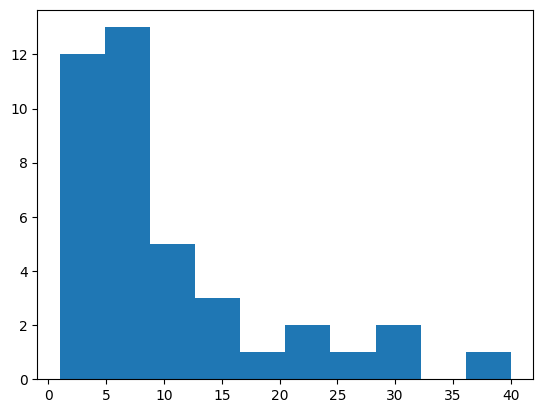

In [54]:
# Plot a histogram of the line lengths
import matplotlib.pyplot as plt
plt.hist(line_num_words)

# Show the plot
plt.show()

# Simple topic identification
Word counts with bag-of-words

Bag-of-words picker

Building a Counter with bag-of-words

Simple text preprocessing

Text preprocessing steps

Text preprocessing practice

Introduction to gensim

What are word vectors?

Creating and querying a corpus with gensim

Gensim bag-of-words

Tf-idf with gensim

What is tf-idf?

Tf-idf with Wikipedia

# Named-entity recognition

#### This chapter will introduce a slightly more advanced topic: named-entity recognition. You'll learn how to identify the who, what, and where of your texts using pre-trained models on English and non-English text. You'll also learn how to use some new libraries, polyglot and spaCy, to add to your NLP toolbox.

Named Entity Recognition

NER with NLTK

Charting practice

Stanford library with NLTK

Introduction to SpaCy

Comparing NLTK with spaCy NER

spaCy NER Categories

Multilingual NER with polyglot

French NER with polyglot I

French NER with polyglot II

Spanish NER with polyglot

# Building a "fake news" classifier

#### You'll apply the basics of what you've learned along with some supervised machine learning to build a "fake news" detector. You'll begin by learning the basics of supervised machine learning, and then move forward by choosing a few important features and testing ideas to identify and classify fake news articles. Classifying fake news using supervised learning with NLP


Which possible features?

Training and testing

Building word count vectors with scikit-learn

CountVectorizer for text classification

TfidfVectorizer for text classification

Inspecting the vectors

Training and testing a classification model with scikit-learn

Text classification models

Training and testing the "fake news" model with CountVectorizer

Training and testing the "fake news" model with TfidfVectorizer

Simple NLP, complex problems

Improving the model

Improving your model

Inspecting your model

# Sentiment Analysis in Python

# Sentiment Analysis Nuts and Bolts

#### Have you ever checked the reviews or ratings of a product or a service before you purchased it? Then you have very likely came face-to-face with sentiment analysis. In this chapter, you will learn the basic structure of a sentiment analysis problem and start exploring the sentiment of movie reviews.

Elements of a sentiment analysis problem

How many positive and negative reviews are there?

Longest and shortest reviews

Sentiment analysis types and approaches

Detecting the sentiment of Tale of Two Cities

Comparing the sentiment of two strings

What is the sentiment of a movie review?

Let's build a word cloud!

Your first word cloud

Which words are in the word cloud?

Word Cloud on movie reviews

In [55]:
#How many positive and negative reviews are there?
import pandas as pd
movies = pd.read_csv("data/IMDB Dataset.csv")
# replace_map = {"sentiment" : {"positive": 1, "negative": 0}}
# movies.replace(replace_map, inplace = True)

def map_sentiment(sentiment):
    if sentiment == "positive":
        return 1
    elif sentiment == "negative":
        return 0

movies["label"] = movies["sentiment"].apply(map_sentiment)
movies.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [56]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', (movies.label == 1).sum() / len(movies))
print("----------- \n", 'Proportion of positive and negative reviews: ', movies.label.value_counts() / len(movies))

Number of positive and negative reviews:  label
1    25000
0    25000
Name: count, dtype: int64
Proportion of positive and negative reviews:  0.5
----------- 
 Proportion of positive and negative reviews:  label
1    0.5
0    0.5
Name: count, dtype: float64


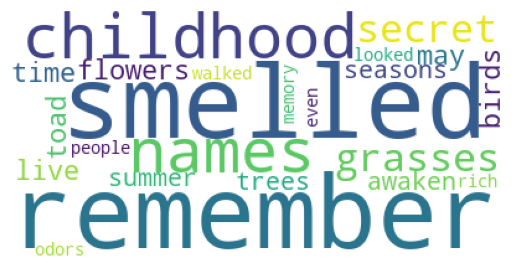

In [57]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

east_of_eden = "I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich."

# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)
plt.imshow(cloud_east_of_eden)
plt.axis("off")
plt.show()

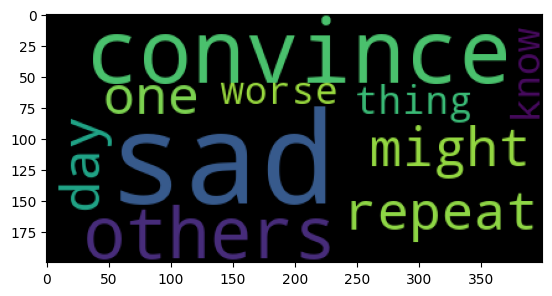

In [58]:
illuminated = "I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad."

plt.imshow(WordCloud().generate(illuminated))

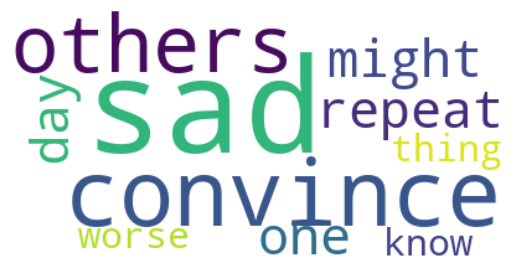

In [59]:
# Create and generate a word cloud image
my_stopwords = {'yours', 'she', "what's", 'www', 'over', 'just', 'him', 'film', 'who', "you've", 'whom', 'movie', 'of', "she'd", 'only', 'are', 'did', "they're", "couldn't", 'being', "there's", "you'd", 'can', "shan't", 'her', 'again', "shouldn't", 'so', 'should', 'own', "i've", "where's", 'all', 'ever', 'herself', 'its', "can't", 'those', 'movies', 'am', 'out', 'me', "isn't", 'shall', "that's", "i'll", 'but', "it's", "she'll", 'after', 'http', 'during', 'they', 'was', 'against', 'their', "we're", 'hence', 'br', 'too', 'could', 'an', 'any', 'nor', 'there', 'yourselves', 'until', 'cannot', 'that', "you're", 'very', 'what', 'same', 'it', 'else', 'myself', "hadn't", 'theirs', 'for', "he's", "mustn't", 'our', 'more', 'such', 'r', 'no', 'before', 'most', 'themselves', 'would', 'further', 'about', 'com', 'hers', 'below', 'been', "wasn't", 'above', "i'd", "weren't", 'itself', 'k', 'does', 'between', 'down', 'have', "he'd", 'we', "when's", "didn't", 'where', 'is', 'other', 'then', 'from', "she's", 'under', 'these', 'a', 'ours', 'because', 'however', "we've", 'to', 'here', 'not', 'or', 'watch', 'my', 'his', 'at', 'had', "here's", 'on', "aren't", 'which', 'yourself', 'how', 'each', 'films', 'having', 'also', "wouldn't", "we'll", 'than', 'has', "won't", "they've", 'i', 'otherwise', 'off', "they'd", "who's", "you'll", "why's", 'do', 'doing', "hasn't", "how's", 'once', 'up', 'like', 'as', 'the', 'himself', 'get', 'in', 'you', 'this', 'he', 'with', 'therefore', "they'll", 'your', 'while', "haven't", 'ought', 'some', 'why', "doesn't", "let's", 'if', "he'll", 'few', 'and', 'them', 'both', "i'm", 'were', 'by', 'when', "we'd", "don't", 'through', 'into', 'since', 'be', 'ourselves'}
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(illuminated)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

#Numeric Features from Reviews

### Imagine you are in the shoes of a company offering a variety of products. You want to know which of your products are bestsellers and most of all - why. We embark on step 1 of understanding the reviews of products, using a dataset with Amazon product reviews. To that end, we transform the text into a numeric form and consider a few complexities in the process. Bag-of-words

Which statement about BOW is true?

Your first BOW

BOW using product reviews

Getting granular with n-grams

Specify token sequence length with BOW

Size of vocabulary of movies reviews

BOW with n-grams and vocabulary size

Build new features from text

Tokenize a string from GoT

Word tokens from the Avengers

A feature for the length of a review

Can you guess the language?

Identify the language of a string

Detect language of a list of strings

Language detection of product reviews

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
# Sample dataset of Amazon product reviews
data = {
    'text': [
        "This product is amazing and works great!",
        "Terrible product. I would not recommend it.",
        "It's okay, but not worth the price.",
        "I love this product. It's fantastic!",
        "The worst product I've ever bought.",
    ],
    'label': [1, 0, 0, 1, 0]  # 1 for positive, 0 for negative
}

df = pd.DataFrame(data)

#create a CountVectorizer to convert text into bow
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(df['text'])

bow_df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
bow_df['label'] = df['label']

print(bow_df)

   amazing  and  bought  but  ever  fantastic  great  is  it  love  ...   
0        1    1       0    0     0          0      1   1   0     0  ...  \
1        0    0       0    0     0          0      0   0   1     0  ...   
2        0    0       0    1     0          0      0   0   1     0  ...   
3        0    0       0    0     0          1      0   0   1     1  ...   
4        0    0       1    0     1          0      0   0   0     0  ...   

   recommend  terrible  the  this  ve  works  worst  worth  would  label  
0          0         0    0     1   0      1      0      0      0      1  
1          1         1    0     0   0      0      0      0      1      0  
2          0         0    1     0   0      0      0      1      0      0  
3          0         0    0     1   0      0      0      0      0      1  
4          0         0    1     0   1      0      1      0      0      0  

[5 rows x 24 columns]


In [62]:
sentance = "Mary and Samantha arrived at the bus station early but waited until noon for the bus"

def word_extraction(sentance):
    ignore = ["a", "the", "is", "and"]
    words = re.sub("[^\w]", " ", sentance).split()
    cleaned_text = [w.lower() for w in words if w not in ignore]
    return cleaned_text


In [63]:
import nltk 
from nltk.corpus import stopwords

#set of predefined words per language
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [64]:
def tokenize(sentences):    
    words = []    
    for sentence in sentences:        
        w = word_extraction(sentence)        
        words.extend(w)            
        words = sorted(list(set(words)))    
    return words


In [65]:
txt = ["Joe waited for the train", "The train was late", "Mary and Samantha took the bus","I looked for Mary and Samantha at the bus station", "Mary and Samantha arrived at the bus station early but waited until noon for the bus"]
tokenize(txt)

['arrived',
 'at',
 'bus',
 'but',
 'early',
 'for',
 'i',
 'joe',
 'late',
 'looked',
 'mary',
 'noon',
 'samantha',
 'station',
 'the',
 'took',
 'train',
 'until',
 'waited',
 'was']

In [66]:
import numpy

def generate_bow(allsentences):        
    vocab = tokenize(allsentences)    
    print("Word List for Document \n{0} \n".format(vocab))
    
    for sentence in allsentences:        
        words = word_extraction(sentence)        
        bag_vector = numpy.zeros(len(vocab))        
        for w in words:            
            for i, word in enumerate(vocab):                
                if word == w:                     
                    bag_vector[i] += 1                            
        print("{0}\n{1}\n".format(sentence, numpy.array(bag_vector)))


In [67]:
allsentences = ["Joe waited for the train train train", "The train was late", "Mary and Samantha took the bus", "I looked for Mary and Samantha at the bus station", "Mary and Samantha arrived at the bus station early but waited until noon for the bus"]
 
generate_bow(allsentences)

Word List for Document 
['arrived', 'at', 'bus', 'but', 'early', 'for', 'i', 'joe', 'late', 'looked', 'mary', 'noon', 'samantha', 'station', 'the', 'took', 'train', 'until', 'waited', 'was'] 

Joe waited for the train train train
[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 1. 0.]

The train was late
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]

Mary and Samantha took the bus
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]

I looked for Mary and Samantha at the bus station
[0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]

Mary and Samantha arrived at the bus station early but waited until noon for the bus
[1. 1. 2. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.]



In [68]:
def vecorized_tokens(tokens):
    ''' This function takes list of words in a sentence as input 
    and returns a vector of size of filtered_vocab.It puts 0 if the 
    word is not present in tokens and count of token if present.'''
    vectors = []
    for w in filtered_vocab:
        vectors.append(tokens.count(w))
    return vectors

In [69]:
def unique(sequence):
    '''This functions returns a list in which the order remains 
    same and no item repeats.Using the set() function does not 
    preserve the original ordering,so i didnt use that instead'''
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]

In [70]:
#create a list of stopwords.You can import stopwords from nltk too
stopwords = ["and", "to", "for", "a"]

#stop words from nltk
import nltk 
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aleksandrarozwadowska/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
#list of special characters.You can use regular expressions too
special_char = [",", ".", ";", "?", "!", "-"]

#Write the sentences in the corpus,in our case, just two 
string1="Welcome to Great Learning , NOW start learning"
string2="Learning is a good practice"

In [72]:
#convert them to lower case
string1 = string1.lower()
string2 = string2.lower()

#split the sentences into tokens
tokens1 = string1.split()
tokens2 = string2.split()

print(tokens1)
print(tokens2)

['welcome', 'to', 'great', 'learning', ',', 'now', 'start', 'learning']
['learning', 'is', 'a', 'good', 'practice']


In [73]:
#create a vocabulary list
vocab = unique(tokens1+tokens2)
print(vocab)

['welcome', 'to', 'great', 'learning', ',', 'now', 'start', 'is', 'a', 'good', 'practice']


In [74]:
#filter the vocabulary list
filtered_vocab = []
for w in vocab:
    if w not in stopwords and w not in special_char:
        filtered_vocab.append(w)
print(filtered_vocab)

['welcome', 'great', 'learning', 'start', 'good', 'practice']


In [75]:
#convert sentences into vectords
vector1 = vecorized_tokens(tokens1)
vector2 = vecorized_tokens(tokens2)

print(vector1)
print(vector2)

[1, 1, 2, 1, 0, 0]
[0, 0, 1, 0, 1, 1]


In [76]:
#Create a Bag of Words Model with Sklearn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

sentence_1="This is a good job.I will not miss it for anything"
sentence_2="This is not good at all"

CountVec = CountVectorizer(ngram_range=(1,1), stop_words="english")

#transform
Count_data = CountVec.fit_transform([sentence_1, sentence_2])

#create dataframe
cv_datafame = pd.DataFrame(Count_data.toarray(), columns=CountVec.get_feature_names_out())
cv_datafame.head()

,good,job,miss
0,1,1,1
1,1,0,0


In [77]:
from nltk import word_tokenize

word_tokenize(sentence_1)

['This',
 'is',
 'a',
 'good',
 'job.I',
 'will',
 'not',
 'miss',
 'it',
 'for',
 'anything']

In [78]:
movies.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [79]:
word_tokens = [word_tokenize(review) for review in movies.review]
print(word_tokens)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [80]:
len_tokens = []

#iterate over the word_tokens list
for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))
    
#create a new feature for the length of each review
movies['n_tokens'] = len_tokens

In [81]:
movies.head()

,review,sentiment,label,n_tokens
0,One of the other reviewers has mentioned that ...,positive,1,380
1,A wonderful little production. <br /><br />The...,positive,1,201
2,I thought this was a wonderful way to spend ti...,positive,1,205
3,Basically there's a family where a little boy ...,negative,0,175
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,283


# More on Numeric Vectors: Transforming Tweets

### This chapter continues the process of understanding product reviews. We will cover additional complexities, especially when working with sentiment analysis data from social media platforms such as Twitter. We will also learn other ways to obtain numeric features from the text.

Stop words

Word cloud of tweets

Airline sentiment with stop words

Multiple text columns

Capturing a token pattern

Specify the token pattern

String operators with the Twitter data

More string operators and Twitter

Stemming and lemmatization

Stems and lemmas from GoT

Stem Spanish reviews

Stems from tweets

TfIdf: More ways to transform text

Your first TfIdf

TfIdf on Twitter airline sentiment data

Tfidf and a BOW on same data

In [82]:
#Capturing a token pattern

mystring = "This chapter continues the process of understanding product reviews. We will cover additional complexities, especially when working with sentiment analysis data from social media platforms such as Twitter. "

#check is a string is composed of letters
mystring.isalpha()

False

In [83]:
#checks if a string is composed only of digits
mystring.isdigit()

False

In [84]:
#checks if a string is composed only of digits
mystring.isdigit()

False

In [85]:
#checks if a string is composed only of alphanumeric characters
mystring.isalnum()

False

In [86]:
#original word tokenization
word_tokens = [word_tokenize(review) for review in movies.review]

#keepinfg only tokens composed of letters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]

In [87]:
len(word_tokens[0])

380

In [88]:
len(cleaned_tokens[0])

310

In [89]:
#regular expressions
import re

mystring = '#Wonderfulday'

#extract # followed by letter, small or capital
x = re.search(r'#A-Za-z', mystring)

In [90]:
print(x)

None


In [91]:
#token pattern i CountVectorizer

#default token pattern in CountVectorizer
#specify a particular token pattern
CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b')

CountVectorizer(token_pattern='\\b[^\\d\\W][^\\d\\W]+\\b')

In [92]:
#specify the token pattern
#build a vectorized from the text column, specifying the regex to be equal to r'\b[^\d\W][^\d\W]'

#build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(movies.review)
vect.transform(movies.review)
print("Length of vectorizer: ", len(vect.get_feature_names_out()))

Length of vectorizer:  99962


In [93]:
vect

CountVectorizer(token_pattern='\\b[^\\d\\W][^\\d\\W]+\\b')

In [94]:
#Basics of CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

text = ["Hello my name is james","james this is my python notebook","james trying to create a big dataset","james of words to try differnt","features of count vectorizer"]

count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()

df = pd.DataFrame(data = count_array, columns=count_vect.get_feature_names_out())
df.head()

,big,count,create,dataset,differnt,features,hello,is,james,my,name,notebook,of,python,this,to,try,trying,vectorizer,words
0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0
2,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [95]:
text = ["hello my name is james","Hello my name is James"]
#lowercase
count_vect = CountVectorizer(lowercase=False)
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()

df = pd.DataFrame(data=count_array, columns=count_vect.get_feature_names_out())
df.head()

,Hello,James,hello,is,james,my,name
0,0,0,1,1,1,1,1
1,1,1,0,1,0,1,1


In [96]:
#lowercase=True

text = ["hello my name is james","Hello my name is James"]
count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data = count_array, columns=count_vect.get_feature_names_out())
print(df)

   hello  is  james  my  name
0      1   1      1   1     1
1      1   1      1   1     1


In [97]:
#stop_words
text = ["Hello my name is james","james this is my python notebook","james trying to create a big dataset","james of words to try differnt","features of count vectorizer"]
count_vect = CountVectorizer(stop_words=["is", "to", "my"])
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data = count_array, columns=count_vect.get_feature_names_out())
df.head()

,big,count,create,dataset,differnt,features,hello,james,name,notebook,of,python,this,try,trying,vectorizer,words
0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0
2,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [98]:
count_vect = CountVectorizer(stop_words="english")
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data = count_array, columns=count_vect.get_feature_names_out())
df.head()

,big,count,create,dataset,differnt,features,hello,james,notebook,python,try,trying,vectorizer,words
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,1,0,0,0,0
2,1,0,1,1,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [99]:
#max_df
count_vect = CountVectorizer(max_df = 1)
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data = count_array, columns=count_vect.get_feature_names_out())
df.head()
#The words ‘is’, ‘to’, ‘james’, ‘my’ and ‘of’ have been removed from the sparse matrix as they occur in more than 1 document.

,big,count,create,dataset,differnt,features,hello,name,notebook,python,this,try,trying,vectorizer,words
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [100]:
#max_df=0.75
count_vect = CountVectorizer(max_df = 0.75)
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()

df = pd.DataFrame(data = count_array, columns=count_vect.get_feature_names_out())
df.head()
#As you can see the word ‘james’ appears in 4 out of 5 documents(85%) 
#and hence crosses the threshold of 75% and removed from the sparse matrix

,big,count,create,dataset,differnt,features,hello,is,my,name,notebook,of,python,this,to,try,trying,vectorizer,words
0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [101]:
#min_df
coun_vect = CountVectorizer(min_df = 2)
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()

df = pd.DataFrame(data = count_array, columns=count_vect.get_feature_names_out())
df.head()

,big,count,create,dataset,differnt,features,hello,is,my,name,notebook,of,python,this,to,try,trying,vectorizer,words
0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [102]:
#max_features
count_vect = CountVectorizer(max_features=3)
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()

df = pd.DataFrame(data=count_array, columns=count_vect.get_feature_names_out())
df.head()
#The CountVectorizer will select the words/features/terms which occur the most frequently. 
#It takes absolute values so if you set the ‘max_features = 3’, 
#it will select the 3 most common words in the data.

,james,my,to
0,1,1,0
1,1,1,0
2,1,0,1
3,1,0,1
4,0,0,0


In [103]:
#binary
#By setting ‘binary = True’, the CountVectorizer no more takes into consideration the frequency of the term/word. 
#If it occurs it’s set to 1 otherwise 0. By default, binary is set to False. 
#This is usually used when the count of the term/word does not provide useful information to the machine learning model.

coun_vect = CountVectorizer(binary=True)
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())

#df = pd.DataFrame(data = count_array, columns=count_vect.get_feature_names_out())
df.head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,big,count,create,dataset,differnt,features,hello,is,james,my,name,notebook,of,python,this,to,try,trying,vectorizer,words
0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0
2,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [104]:
#Vocabulary
#They are the collection of words in the sparse matrix.

count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(text)
print(count_vect.vocabulary_)

{'hello': 6, 'my': 9, 'name': 10, 'is': 7, 'james': 8, 'this': 14, 'python': 13, 'notebook': 11, 'trying': 17, 'to': 15, 'create': 2, 'big': 0, 'dataset': 3, 'of': 12, 'words': 19, 'try': 16, 'differnt': 4, 'features': 5, 'count': 1, 'vectorizer': 18}


In [105]:
#If you just want the vocabulary without the position of the word in the sparse matrix, you can use the method ‘get_feature_names()’. 
#If you notice this is the same method we use while creating our database and setting our columns.

count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(text)
print(count_vect.get_feature_names())

['big', 'count', 'create', 'dataset', 'differnt', 'features', 'hello', 'is', 'james', 'my', 'name', 'notebook', 'of', 'python', 'this', 'to', 'try', 'trying', 'vectorizer', 'words']


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [106]:
count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(text)
print(count_vect.get_feature_names_out())

['big' 'count' 'create' 'dataset' 'differnt' 'features' 'hello' 'is'
 'james' 'my' 'name' 'notebook' 'of' 'python' 'this' 'to' 'try' 'trying'
 'vectorizer' 'words']


In [107]:
#bag of words - Bag of Words Algorithm with Python
def vectorize(tokens):
    '''this funciton takes list of words in a sentence as input and returns a vector of size of filtered_vocab.
    It puts 0 if the word is not present in tokens and count of tokens is present.'''
    vector = []
    for w in filtered_vocab:
        vector.append(tokens.count(w))
    return vector

def unique(sequence):
    '''this functions returns a list i which the order remains same and no item repeats. 
    Using the set() function does not preserve the original ordering, so i didnt use that instead.'''
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]

#create a list of stopwords (possible to import stopwords from nltk)
stopwords = ["to", "is", "a"]

#list of special characters characters
special_char = [",", ".", ";", ":", "?", "!"]

In [108]:
#sentences
string1 = "welocome to the Great Learning, Now start learning."
string2 = "Learning is a good partice"

#to lower case
string1 = string1.lower()
string2 = string2.lower()

#split into tokens
tokens1 = string1.split()
tokens2 = string2.split()

print(tokens1)
print(tokens2)

['welocome', 'to', 'the', 'great', 'learning,', 'now', 'start', 'learning.']
['learning', 'is', 'a', 'good', 'partice']


In [109]:
#create a vocabulary list
vocab = unique(tokens1 + tokens2)
print(vocab)

['welocome', 'to', 'the', 'great', 'learning,', 'now', 'start', 'learning.', 'learning', 'is', 'a', 'good', 'partice']


In [110]:
#filter the vocabulary list
filtered_vocab = []
for w in vocab:
    if w not in stopwords and w not in special_char:
        filtered_vocab.append(w)
print(filtered_vocab)

['welocome', 'the', 'great', 'learning,', 'now', 'start', 'learning.', 'learning', 'good', 'partice']


In [111]:
#convert senctences into vectors
vector1 = vectorize(tokens1)
vector2 = vectorize(tokens2)
print("vector1: ", vector1, "\nvector2: ", vector2)

vector1:  [1, 1, 1, 1, 1, 1, 1, 0, 0, 0] 
vector2:  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]


In [112]:
#create a bag of words model with sklearn 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

sentence1 = "This is a good job. I will not miss it for anything."
sentence2 = "This is not good at all."

In [113]:
countvec = CountVectorizer(ngram_range = (1,1), stop_words = "english")

#transform
countdata = countvec.fit_transform([sentence1, sentence2])

#create dataframe
cvdataframe = pd.DataFrame(countdata.toarray(), columns=countvec.get_feature_names_out())
print(cvdataframe)

   good  job  miss
0     1    1     1
1     1    0     0


In [114]:
sentence3 = """We employ machine learning to predict the sentiment of a review based on the words used in the review. We use logistic regression and evaluate its performance in a few different ways. These are some solid first models!.Let's predict the sentiment!. Logistic regression of movie reviews. Logistic regression using Twitter data. Did we really predict the sentiment well? Build and assess a model: movies reviews. Performance metrics of Twitter data. Build and assess a model: product reviews data. Logistic regression: revisited. Predict probabilities of movie reviews. Product reviews with regularization. Regularizing models with Twitter data. Bringing it all together Step 1: Word cloud and feature creation Step 2: Building a vectorizer Step 3: Building a classifier. Wrap up"""
countvec = CountVectorizer(stop_words = "english")

#transform
countdata = countvec.fit_transform([sentence3])

#create dataframe
cvdataframe = pd.DataFrame(countdata.toarray(), columns=countvec.get_feature_names_out())
cvdataframe.head()

,assess,based,bringing,build,building,classifier,cloud,creation,data,did,...,step,twitter,use,used,using,vectorizer,ways,word,words,wrap
0,2,1,1,2,2,1,1,1,4,1,...,3,3,1,1,1,1,1,1,1,1


In [115]:
countvec = CountVectorizer(max_features=15, stop_words = "english")
countdata = countvec.fit_transform([sentence3])
cvdataframe = pd.DataFrame(countdata.toarray(), columns=countvec.get_feature_names_out())
cvdataframe.head()

,assess,building,data,logistic,model,models,movie,performance,predict,regression,review,reviews,sentiment,step,twitter
0,2,2,4,4,2,2,2,2,4,4,2,5,3,3,3


In [116]:
countvec = CountVectorizer(max_df = 1, stop_words = "english")
countdata = countvec.fit_transform([sentence3])
cvdataframe = pd.DataFrame(countdata.toarray(), columns=countvec.get_feature_names_out())
cvdataframe.head()

,assess,based,bringing,build,building,classifier,cloud,creation,data,did,...,step,twitter,use,used,using,vectorizer,ways,word,words,wrap
0,2,1,1,2,2,1,1,1,4,1,...,3,3,1,1,1,1,1,1,1,1


# n-gram
An N-gram is an N-token sequence of words: a 2-gram (more commonly called a bigram) is a two-word sequence of words like “really good”, “not good”, or “your homework”, and a 3-gram (more commonly called a trigram) is a three-word sequence of words like “not at all”, or “turn off light”.

In [117]:
#Tf-Idf
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

sentence_1="This is a good job.I will not miss it for anything"
sentence_2="This is not good at all"

#without smooth IDF
print("without smoothing: ")
tfidf_vec = TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(1,1), stop_words="english")
tfidf_data = tfidf_vec.fit_transform([sentence_1, sentence_2])

tfidf_df = pd.DataFrame(data = tfidf_data.toarray(), columns=tfidf_vec.get_feature_names_out())
tfidf_df.head()

without smoothing: 


,good,job,miss
0,0.385372,0.652491,0.652491
1,1.000000,0.000000,0.000000


In [118]:
#with smooth
print("with smoothing: ")
tfidf_vec = TfidfVectorizer(use_idf=True, smooth_idf=True, ngram_range=(1,1), stop_words="english")
tfidf_data = tfidf_vec.fit_transform([sentence_1, sentence_2])
tfidf_df = pd.DataFrame(data=tfidf_data.toarray(), columns=tfidf_vec.get_feature_names_out())
tfidf_df.head()

with smoothing: 


,good,job,miss
0,0.449436,0.631667,0.631667
1,1.000000,0.000000,0.000000


# Let's Predict the Sentiment

### We employ machine learning to predict the sentiment of a review based on the words used in the review. We use logistic regression and evaluate its performance in a few different ways. These are some solid first models!

Let's predict the sentiment!

Logistic regression of movie reviews

Logistic regression using Twitter data

Did we really predict the sentiment well?

Build and assess a model: movies reviews

Performance metrics of Twitter data

Build and assess a model: product reviews data

Logistic regression: revisited

Predict probabilities of movie reviews

Product reviews with regularization

Regularizing models with Twitter data

Bringing it all together

Step 1: Word cloud and feature creation

Step 2: Building a vectorizer

Step 3: Building a classifier

Wrap up


In [119]:
#https://towardsdatascience.com/sentiment-analysis-using-logistic-regression-and-naive-bayes-16b806eb4c4b
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import numpy as np

In [120]:
#Preprocessing tweets
def process_tweet(tweet):
    #Remove old style retweet text "RT"
    tweet2 = re.sub(r'^RT[\s]','', tweet)
    
    #Remove hyperlinks
    tweet2 = re.sub(r'https?:\/\/.*[\r\n]*','', tweet2)
    
    #Remove hastags
    #Only removing the hash # sign from the word
    tweet2 = re.sub(r'#','',tweet2)
        
    # instantiate tokenizer class
    tokenizer = TweetTokenizer(preserve_case=False,    strip_handles=True, reduce_len=True)
    
    # tokenize tweets
    tweet_tokens = tokenizer.tokenize(tweet2)    
        
    #Import the english stop words list from NLTK
    stopwords_english = stopwords.words('english') 
    
    #Creating a list of words without stopwords
    tweets_clean = []
    for word in tweet_tokens:
        if word not in stopwords_english and word not in string.punctuation:
            tweets_clean.append(word)
        
    #Instantiate stemming class
    stemmer = PorterStemmer()
    
    #Creating a list of stems of words in tweet
    tweets_stem = []
    for word in tweets_clean:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)
        
    return tweets_stem

In [127]:
#Frequency generating function
def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist()
    
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1
            
    return freqs

In [122]:
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    # calculate the sigmoid of z
    h = 1/(1 + np.exp(-z))
    
    return h

In [123]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    
    m = len(x)
  
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = (-1/m)*(np.dot(y.T,np.log(h)) + np.dot((1-y).T,np.log(1-h)))
        
        # update the weights theta
        theta = theta - (alpha/m)*np.dot(x.T, h-y)
        
    J = float(J)
    return J, theta

In [124]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
        
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word,1),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word,0),0)
        
    assert(x.shape == (1, 3))
    return x

In [126]:
# import the data set from nltk
# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]
train_x = train_pos + train_neg 
test_x = test_pos + test_neg
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

NameError: name 'all_positive_tweets' is not defined

In [ ]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)
# training labels corresponding to X
Y = train_y
# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")